In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = 'data/raw/WorldCupMatches.csv'

wcm_df = pd.read_csv(file_path)

In [3]:
# function to make all column names to lowercase
def update_columns_to_lower(df):
    df.columns = df.columns.str.lower().str.strip()
    return df


# function to convert all floats as integers
def float_to_int(df):
    for column in df.columns:
        if df[column].dtype == 'float64':
            df[column] = df[column].astype(int)
    return df


In [4]:
cleaned_df = wcm_df.dropna(thresh=3)

In [5]:
attendance_mean = wcm_df['Attendance'].mean()

In [6]:
cleaned_df['Attendance'] = cleaned_df['Attendance'].fillna(attendance_mean)

/tmp/ipykernel_17912/1476385943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Attendance'] = cleaned_df['Attendance'].fillna(attendance_mean)


In [7]:
cleaned_df = float_to_int(cleaned_df)

/tmp/ipykernel_17912/3882775948.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(int)
/tmp/ipykernel_17912/3882775948.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(int)
/tmp/ipykernel_17912/3882775948.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [8]:
cleaned_df = update_columns_to_lower(cleaned_df)

In [12]:
# Filter matches involving Spain
spain_matches = cleaned_df[(cleaned_df['home team name'] == 'Spain') | (cleaned_df['away team name'] == 'Spain')]

In [20]:
# For matches where Spain was the home team
spain_home_matches = spain_matches[spain_matches['home team name'] == 'Spain']
spain_home_goals_scored = spain_home_matches['home team goals'].sum()
spain_home_goals_conceded = spain_home_matches['away team goals'].sum()

# For matches where Spain was the away team
spain_away_matches = spain_matches[spain_matches['away team name'] == 'Spain']
spain_away_goals_scored = spain_away_matches['away team goals'].sum()
spain_away_goals_conceded = spain_away_matches['home team goals'].sum()


In [21]:
# Calculate total goals scored and conceded by Spain
total_goals_scored = spain_home_goals_scored + spain_away_goals_scored
total_goals_conceded = spain_home_goals_conceded + spain_away_goals_conceded

# Calculate Spain's goal differential
spain_goal_differential = total_goals_scored - total_goals_conceded

In [22]:
# Create a DataFrame to store Spain's goal information
spain_goals_info = pd.DataFrame({
    'Team': ['Spain'],
    'Total Goals Scored': [total_goals_scored],
    'Total Goals Conceded': [total_goals_conceded],
    'Goal Differential': [spain_goal_differential]
})

In [23]:
spain_goals_info.head()

,Team,Total Goals Scored,Total Goals Conceded,Goal Differential
0,Spain,92,66,26


In [35]:
# Filter matches involving Spain
spain_home_matches = cleaned_df[cleaned_df['home team name'] == 'Spain']
spain_away_matches = cleaned_df[cleaned_df['away team name'] == 'Spain']
spain_matches = pd.concat([spain_home_matches, spain_away_matches])

# Calculate Average Goals Scored and Conceded when Spain is Home
avg_goals_scored_home = spain_home_matches['home team goals'].mean()
avg_goals_conceded_home = spain_home_matches['away team goals'].mean()

# Calculate Average Goals Scored and Conceded when Spain is Away
avg_goals_scored_away = spain_away_matches['away team goals'].mean()
avg_goals_conceded_away = spain_away_matches['home team goals'].mean()

# Calculate Overall Average Goals Scored and Conceded
avg_goals_scored = (avg_goals_scored_home + avg_goals_scored_away) / 2
avg_goals_conceded = (avg_goals_conceded_home + avg_goals_conceded_away) / 2

print("Average goals scored by Spain per match:", avg_goals_scored)
print("Average goals conceded by Spain per match:", avg_goals_conceded)


Average goals scored by Spain per match: 1.5574712643678161
Average goals conceded by Spain per match: 1.1206896551724137


In [ ]:
data = {"Wins"}

In [31]:
# Opponents Spain has beaten the most
most_wins = spain_matches[spain_matches['home team name'] == 'Spain']['away team name'].value_counts()

# Opponents Spain has lost to the most
most_losses = spain_matches[spain_matches['away team name'] == 'Spain']['home team name'].value_counts()

#print(most_wins)
print(most_losses)


home team name
Italy               3
Brazil              3
Germany             2
Germany FR          2
Northern Ireland    2
Uruguay             2
Netherlands         1
Paraguay            1
Chile               1
Saudi Arabia        1
South Africa        1
Bolivia             1
Denmark             1
Belgium             1
Korea Republic      1
Algeria             1
Austria             1
Argentina           1
Czechoslovakia      1
Sweden              1
Australia           1
Name: count, dtype: int64


In [32]:
cleaned_df.head()

,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,referee,assistant 1,assistant 2,roundid,matchid,home team initials,away team initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [34]:
# Calculate Win-Loss Record
spain_home_wins = len(spain_matches[(spain_matches['home team name'] == 'Spain') & (spain_matches['home team goals'] > spain_matches['away team goals'])])
spain_away_wins = len(spain_matches[(spain_matches['away team name'] == 'Spain') & (spain_matches['away team goals'] > spain_matches['home team goals'])])
spain_wins = spain_home_wins + spain_away_wins

spain_home_losses = len(spain_matches[(spain_matches['home team name'] == 'Spain') & (spain_matches['home team goals'] < spain_matches['away team goals'])])
spain_away_losses = len(spain_matches[(spain_matches['away team name'] == 'Spain') & (spain_matches['away team goals'] < spain_matches['home team goals'])])
spain_losses = spain_home_losses + spain_away_losses

print("Spain's win-loss record:")
print("Wins:", spain_wins)
print("Losses:", spain_losses)


Spain's win-loss record:
Wins: 29
Losses: 18


In [37]:
sns.set(style="whitegrid")

<Axes: >

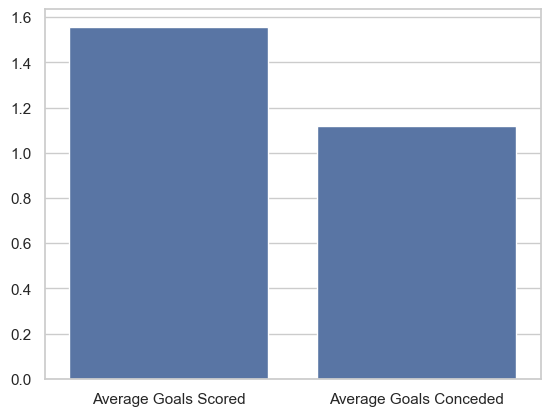

In [38]:
sns.barplot(x=['Average Goals Scored', 'Average Goals Conceded'], y=[avg_goals_scored, avg_goals_conceded])

<Axes: >

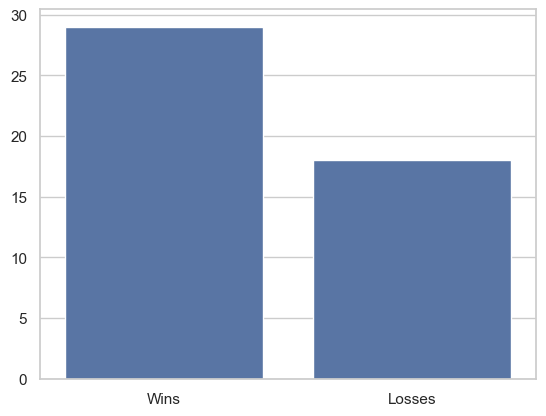

In [39]:
sns.barplot(x=['Wins', 'Losses'], y=[spain_wins, spain_losses])

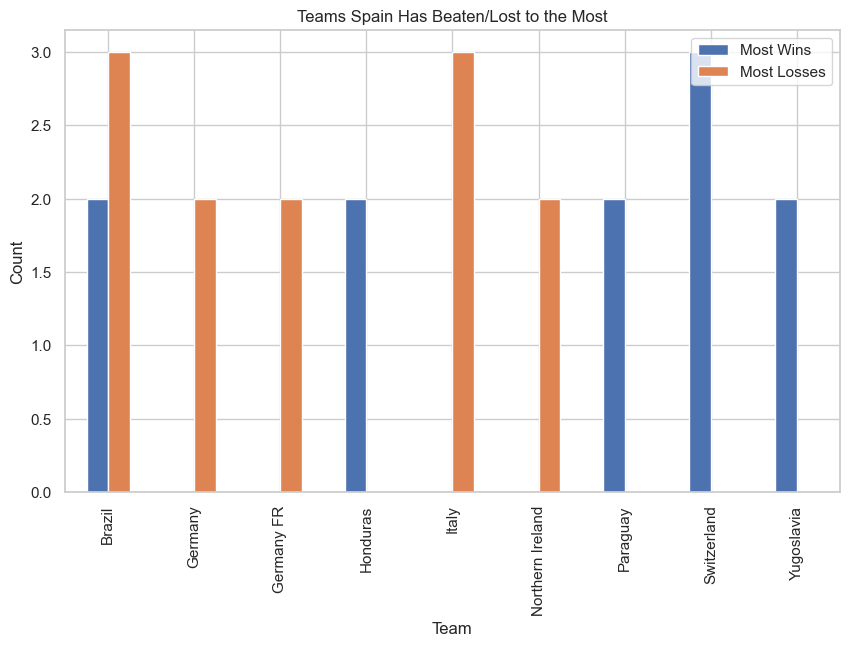

In [46]:
# Count occurrences of teams that Spain has beaten the most and lost to the most
most_wins_counts = spain_matches[spain_matches['home team name'] == 'Spain']['away team name'].value_counts().head(5)
most_losses_counts = spain_matches[spain_matches['away team name'] == 'Spain']['home team name'].value_counts().head(5)

# Combine counts into a single DataFrame
teams_info_df = pd.DataFrame({'Most Wins': most_wins_counts, 'Most Losses': most_losses_counts})

# Fill NaN values with 0
teams_info_df.fillna(0, inplace=True)

# Plot the DataFrame
teams_info_df.plot(kind='bar', figsize=(10, 6), title="Teams Spain Has Beaten/Lost to the Most")
plt.xlabel("Team")
plt.ylabel("Count")
plt.show()


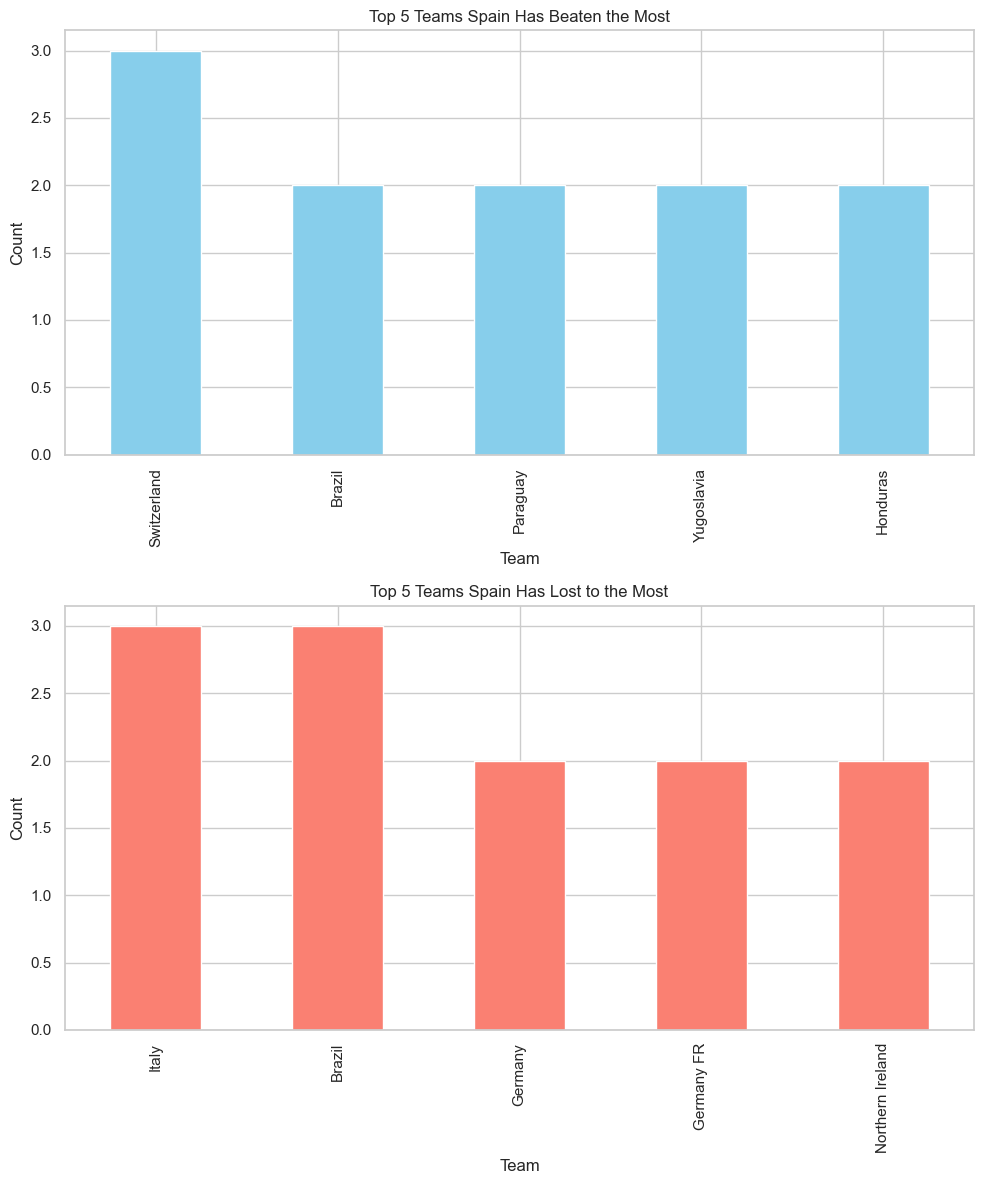

In [48]:
# Count occurrences of teams that Spain has beaten the most and lost to the most
most_wins_counts = spain_matches[spain_matches['home team name'] == 'Spain']['away team name'].value_counts().head(5)
most_losses_counts = spain_matches[spain_matches['away team name'] == 'Spain']['home team name'].value_counts().head(5)

# Create separate plots for most wins and most losses
fig, axs = plt.subplots(2, figsize=(10, 12))

# Plot most wins
most_wins_counts.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Top 5 Teams Spain Has Beaten the Most')
axs[0].set_xlabel('Team')
axs[0].set_ylabel('Count')

# Plot most losses
most_losses_counts.plot(kind='bar', ax=axs[1], color='salmon')
axs[1].set_title('Top 5 Teams Spain Has Lost to the Most')
axs[1].set_xlabel('Team')
axs[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


In [59]:
folder_path = "data/cleaned/"
spain_matches.to_csv(folder_path + 'spain_matches.csv')

In [61]:
# Assume spain_matches is your DataFrame containing matches involving Spain

# Initialize variables to track streaks
current_winning_streak = 0
max_winning_streak = 0
current_losing_streak = 0
max_losing_streak = 0

# Iterate through the DataFrame
for index, match in spain_matches.iterrows():
    if match['home team name'] == 'Spain' or match['away team name'] == 'Spain':
        # Check if Spain won the match
        if (match['home team name'] == 'Spain' and match['home team goals'] > match['away team goals']) or (match['away team name'] == 'Spain' and match['away team goals'] > match['home team goals']):
            current_winning_streak += 1
            # Update max winning streak if current streak is greater
            if current_winning_streak > max_winning_streak:
                max_winning_streak = current_winning_streak
            # Reset losing streak
            current_losing_streak = 0
        # Check if Spain lost the match
        else:
            current_losing_streak += 1
            # Update max losing streak if current streak is greater
            if current_losing_streak > max_losing_streak:
                max_losing_streak = current_losing_streak
            # Reset winning streak
            current_winning_streak = 0

print("Spain's best winning streak:", max_winning_streak)
print("Spain's worst losing streak:", max_losing_streak)


Spain's best winning streak: 7
Spain's worst losing streak: 15


In [63]:
spain_matches.shape

(59, 20)